In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv")
df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN
...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep.",NaN
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
263,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


# **1. Bar Chart**

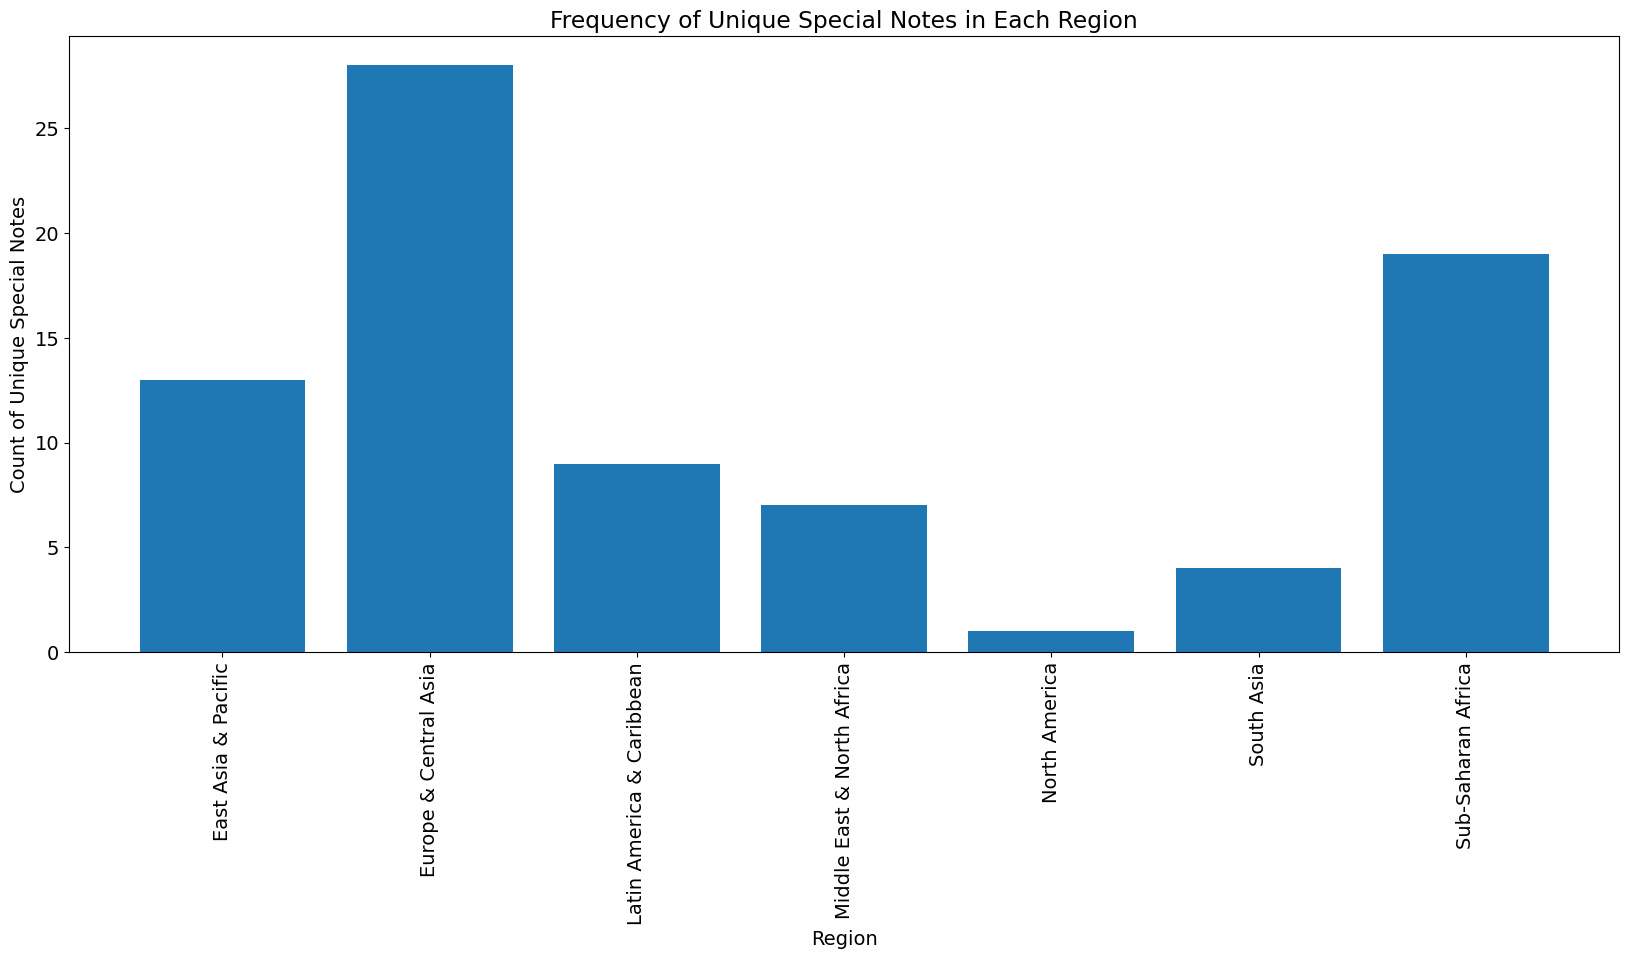

In [18]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(20, 8))
plt.bar(region_counts.index, region_counts.values)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Region')
plt.ylabel('Count of Unique Special Notes')
plt.title('Frequency of Unique Special Notes in Each Region')
plt.show()

# **2. Pie Chart**

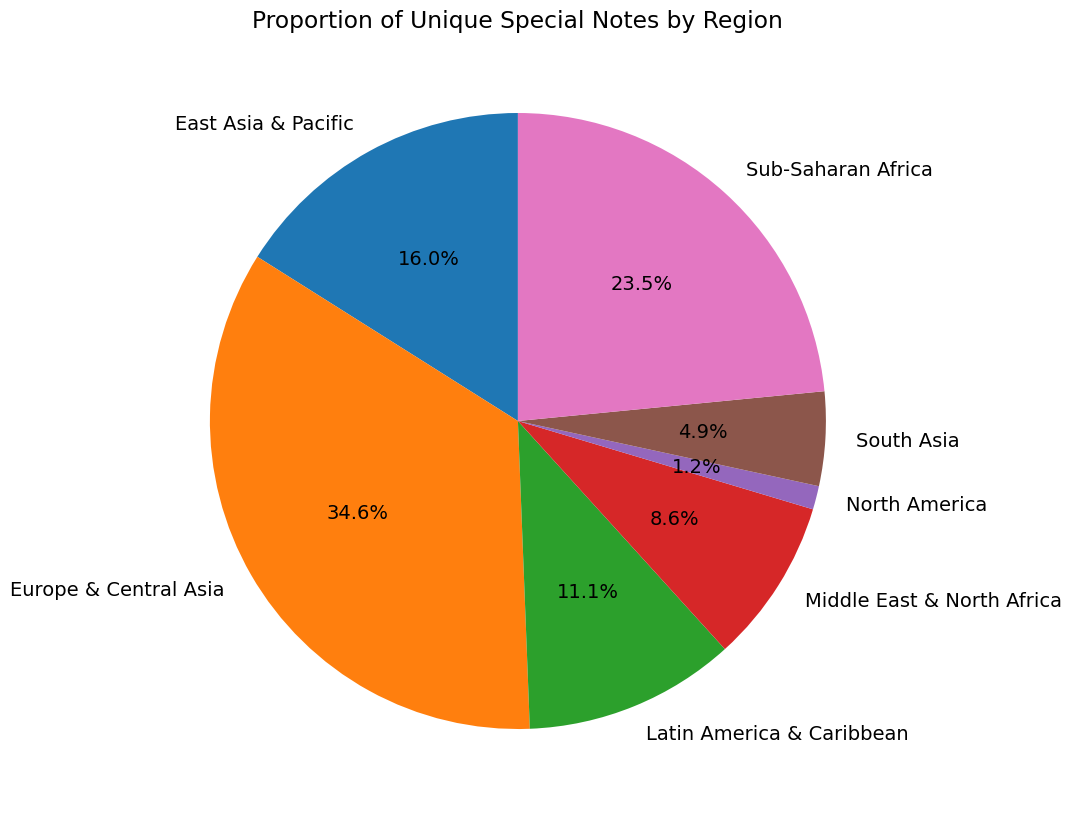

In [19]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(10, 10))
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Unique Special Notes by Region')
plt.show()

# **3. Horizontal Bar Chart**

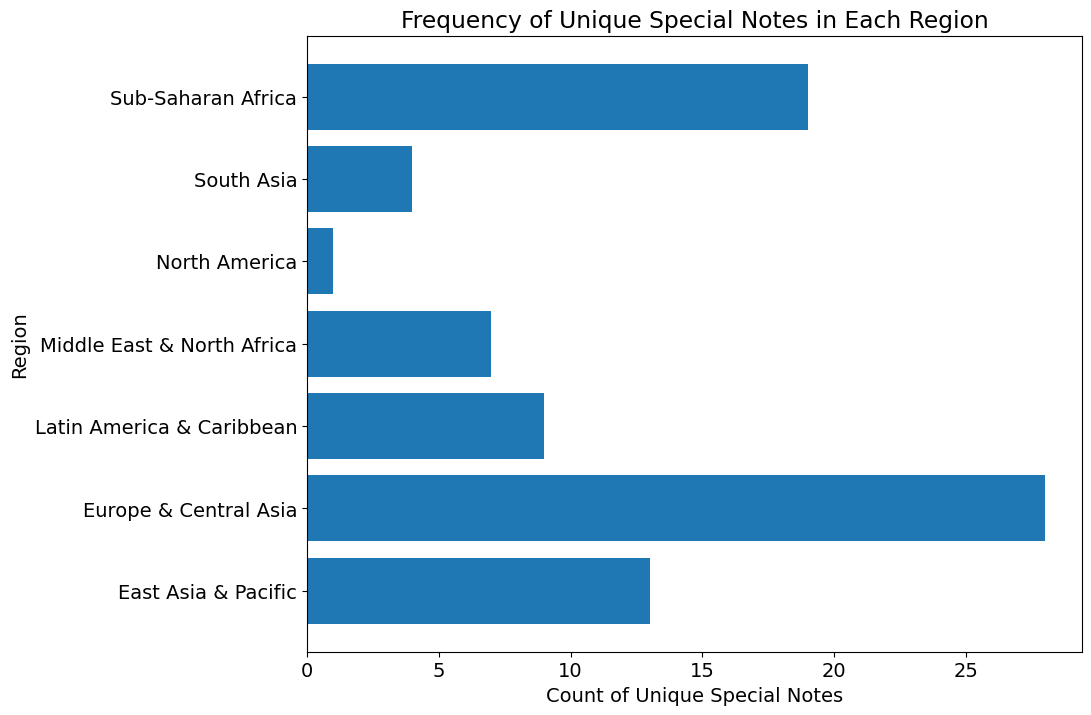

In [20]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(10, 8))
plt.barh(region_counts.index, region_counts.values)
plt.xlabel('Count of Unique Special Notes')
plt.ylabel('Region')
plt.title('Frequency of Unique Special Notes in Each Region')
plt.show()

# **4. Treemap**

In [30]:
!pip install squarify
import squarify

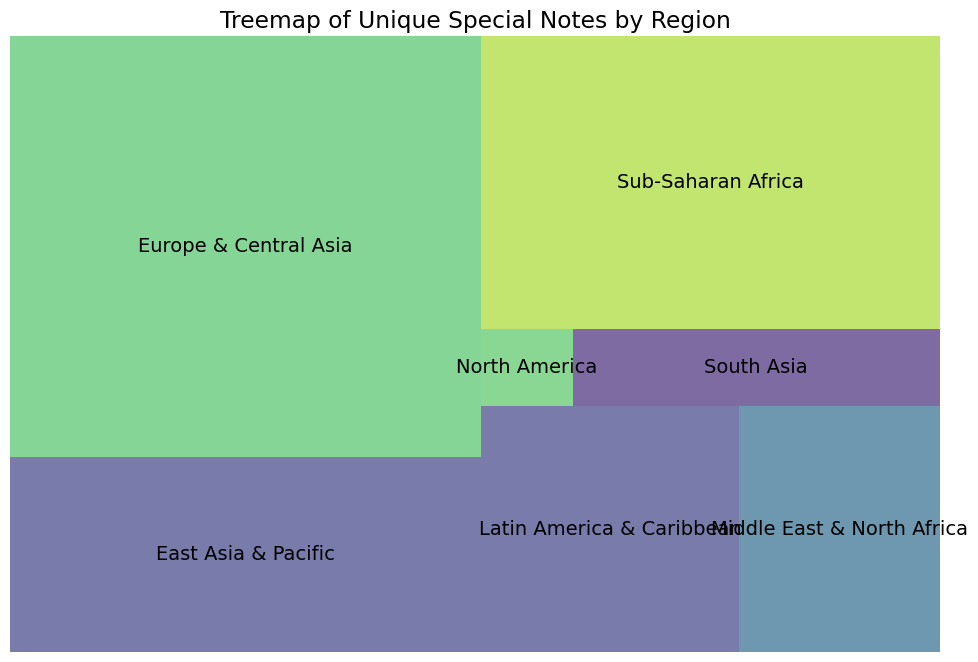

In [31]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(12, 8))
squarify.plot(sizes=region_counts.values, label=region_counts.index, alpha=0.7)
plt.title('Treemap of Unique Special Notes by Region')
plt.axis('off')
plt.show()

# **5. Dot Plot**

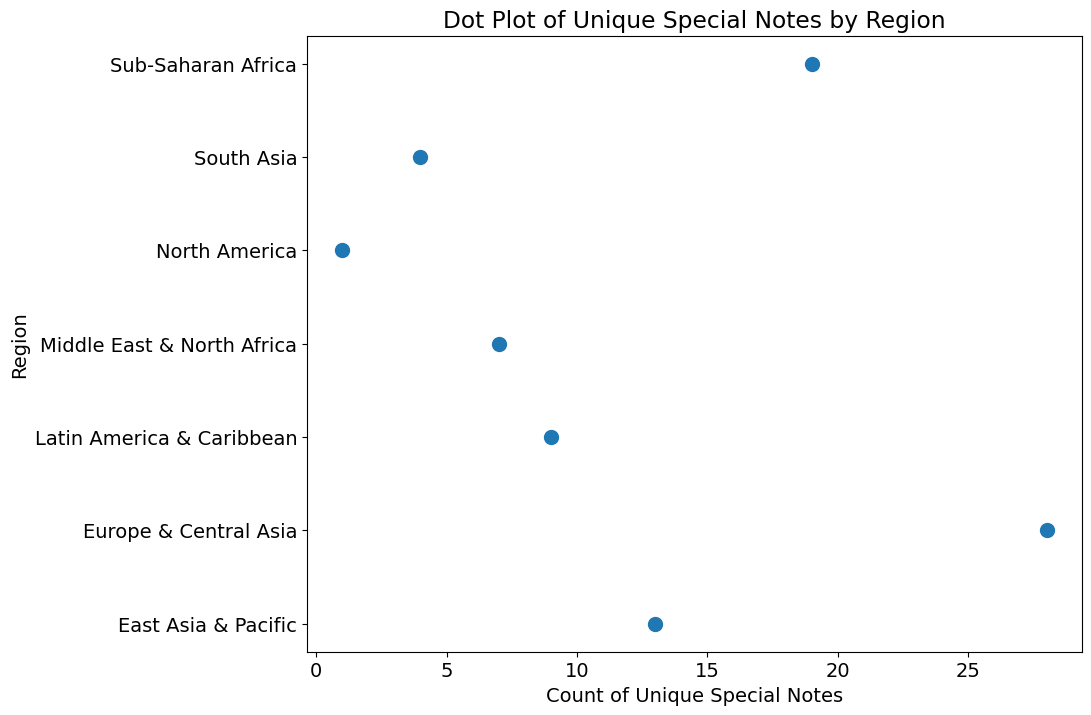

In [24]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(10, 8))
plt.plot(region_counts.values, region_counts.index, 'o', markersize=10)
plt.xlabel('Count of Unique Special Notes')
plt.ylabel('Region')
plt.title('Dot Plot of Unique Special Notes by Region')
plt.show()

# **6. Heatmap**

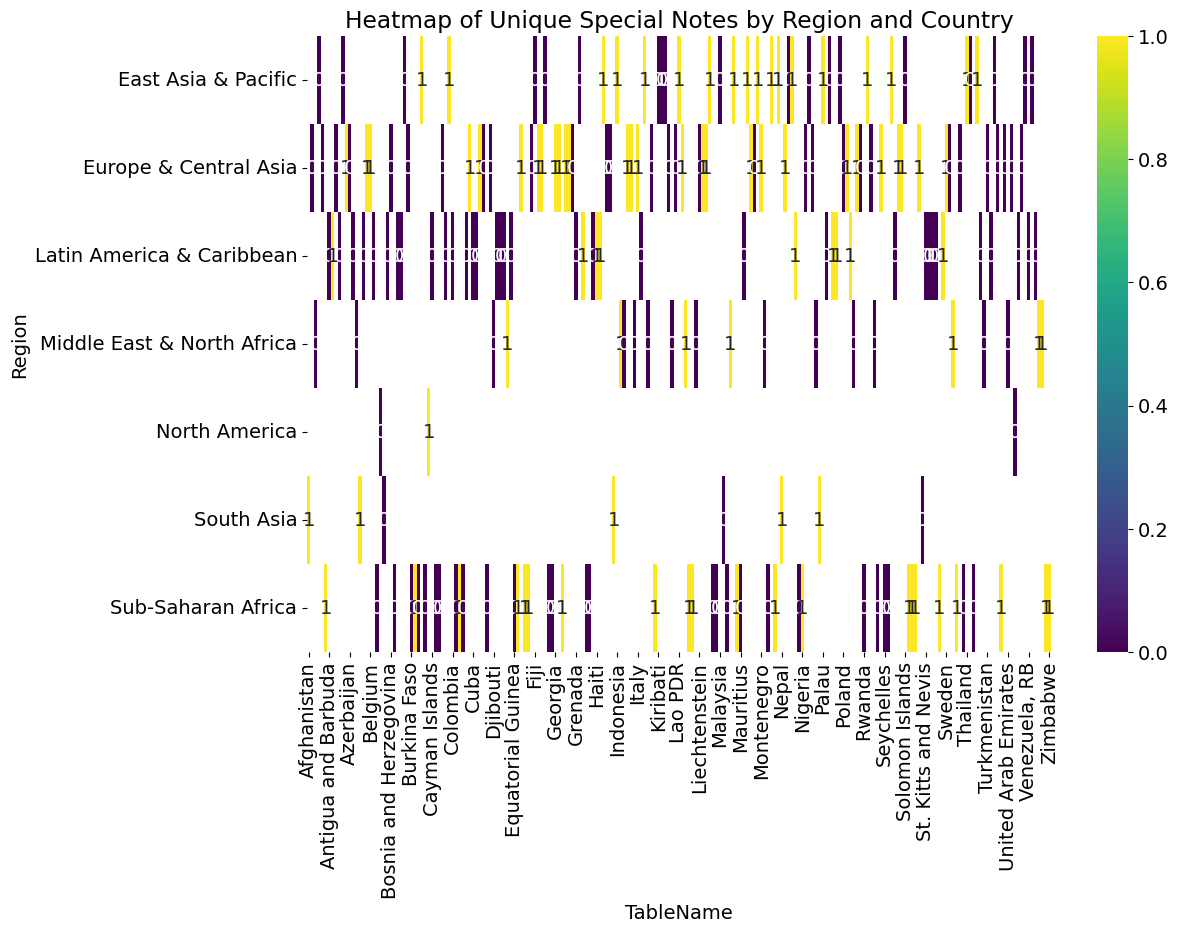

In [26]:
region_country_counts = df.groupby(['Region', 'TableName'])['SpecialNotes'].nunique().reset_index()
heatmap_data = region_country_counts.pivot(index='Region', columns='TableName', values='SpecialNotes')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Unique Special Notes by Region and Country')
plt.show()

# **7. Lollipop Chart**

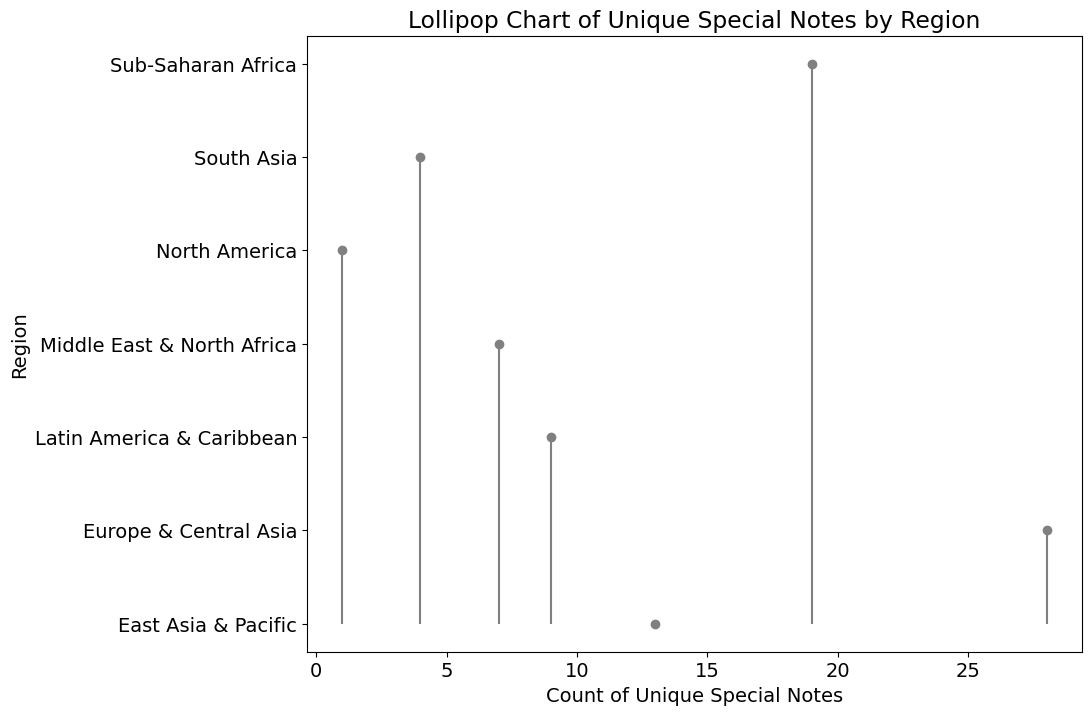

In [27]:
region_counts = df.groupby('Region')['SpecialNotes'].nunique()

plt.figure(figsize=(10, 8))
plt.stem(region_counts.values, region_counts.index, linefmt='grey', markerfmt='o', basefmt=' ')
plt.xlabel('Count of Unique Special Notes')
plt.ylabel('Region')
plt.title('Lollipop Chart of Unique Special Notes by Region')
plt.show()

# **8. Word Cloud**

In [28]:
!pip install wordcloud
from wordcloud import WordCloud

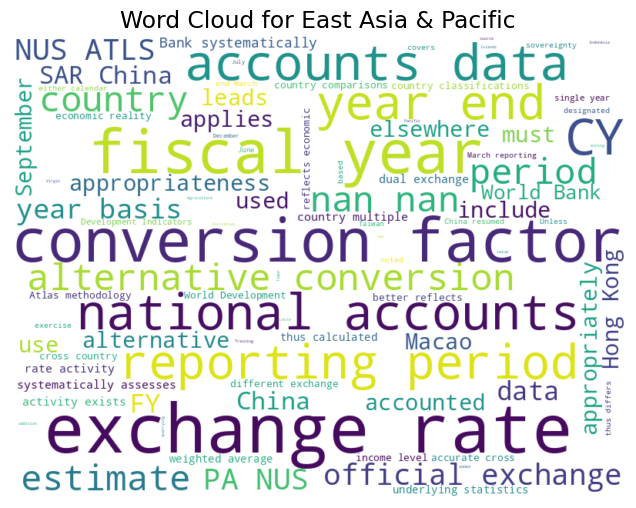

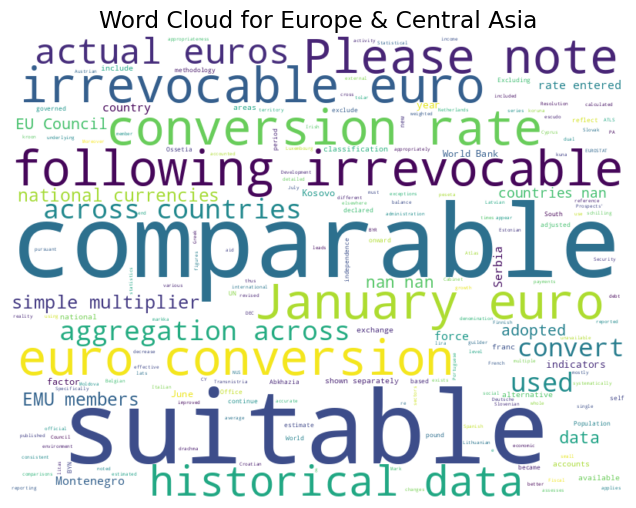

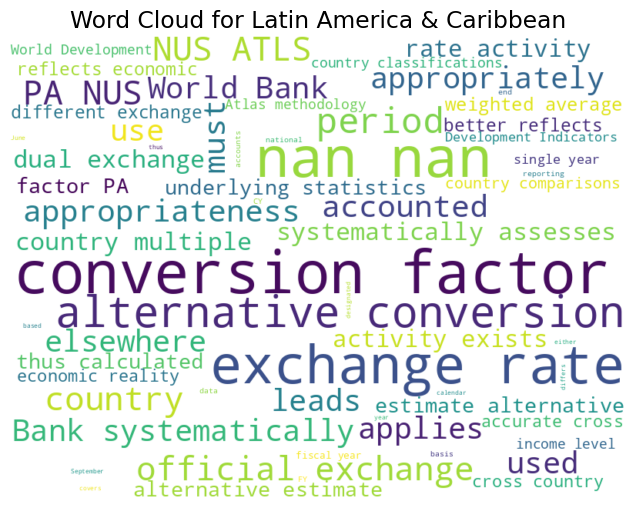

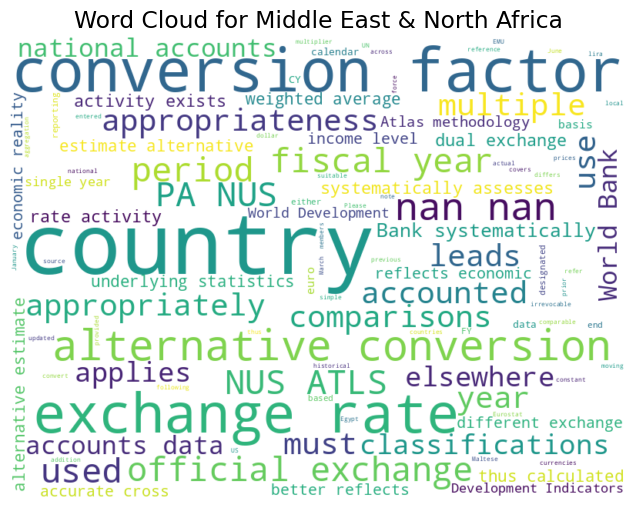

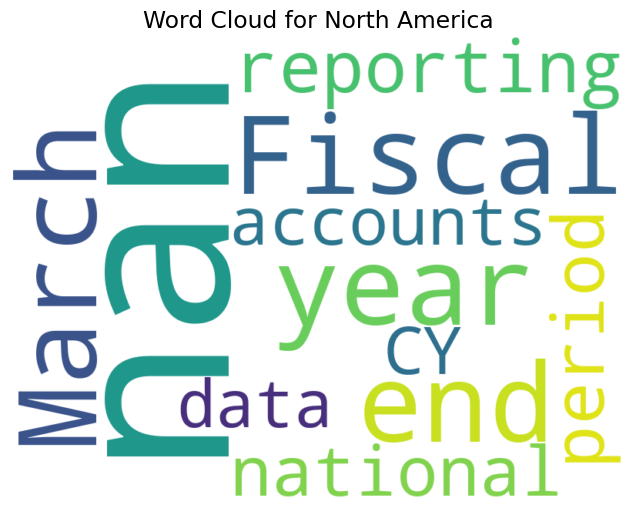

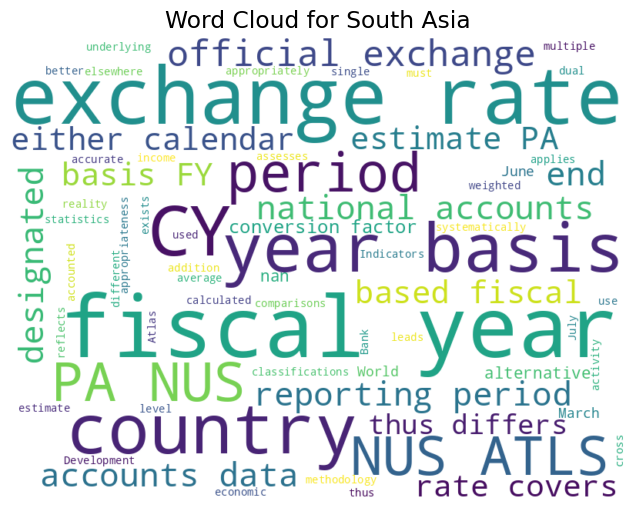

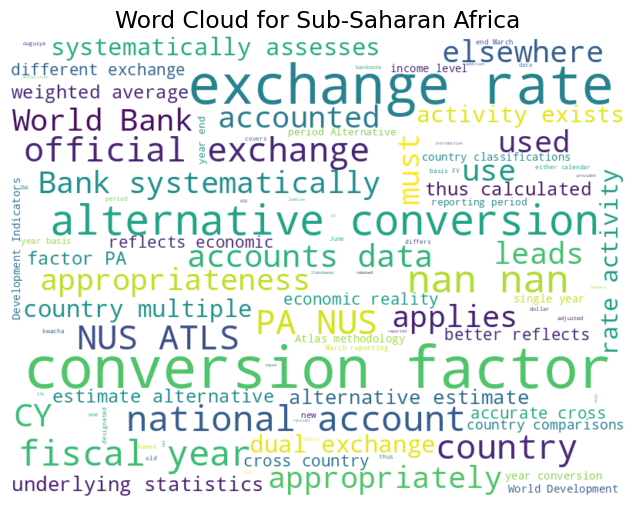

In [29]:
# Combine SpecialNotes for each region
region_text = df.groupby('Region')['SpecialNotes'].apply(lambda x: ' '.join(str(i) for i in x)).reset_index()

for index, row in region_text.iterrows():
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(str(row['SpecialNotes']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {row["Region"]}')
    plt.axis('off')
    plt.show()

# **9. Network Graph**

In [32]:
 !pip install networkx
 import networkx as nx

In [34]:
# Get unique regions
regions = df['Region'].unique()

# Create an empty connection matrix
connection_matrix = pd.DataFrame(0, index=regions, columns=regions)

# Iterate over all region pairs
for region1 in regions:
    for region2 in regions:
        # Get SpecialNotes for each region
        notes1 = set(df[df['Region'] == region1]['SpecialNotes'].unique())
        notes2 = set(df[df['Region'] == region2]['SpecialNotes'].unique())

        # Check for common SpecialNotes
        common_notes = notes1.intersection(notes2)

        # Update connection matrix if common notes exist
        if common_notes:
            connection_matrix.loc[region1, region2] = 1  # You could use len(common_notes) for weighted connections

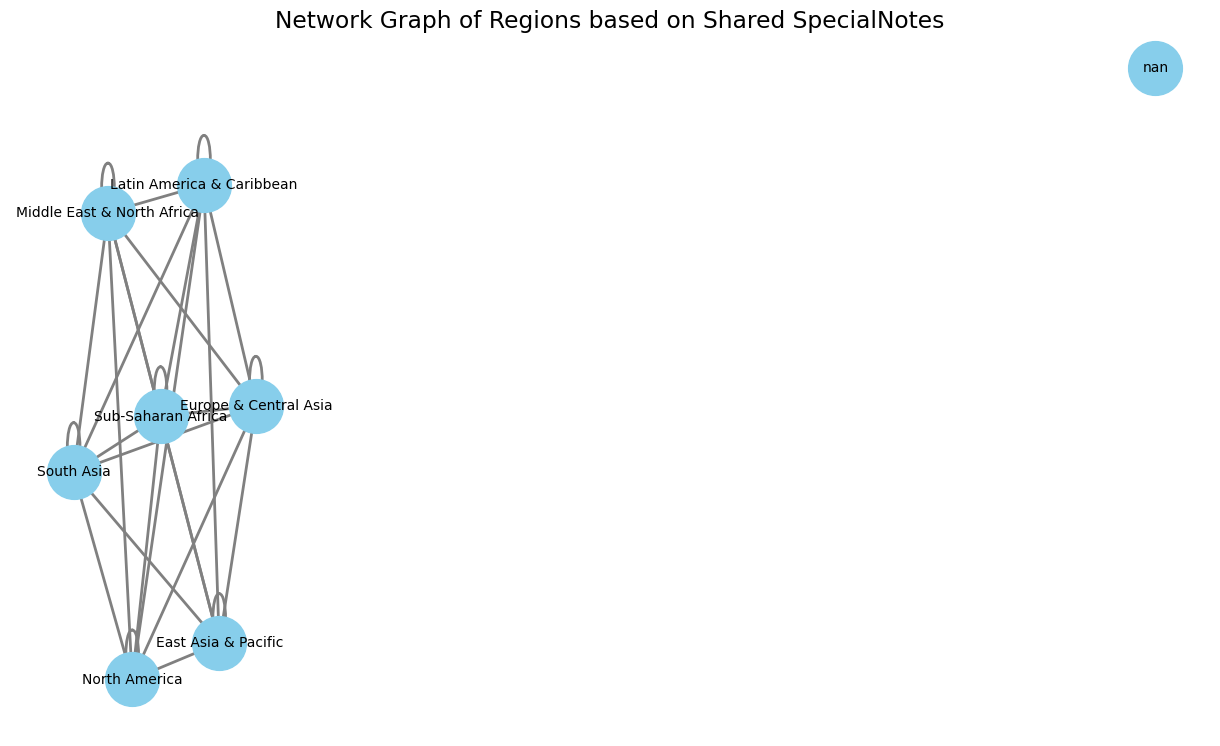

In [45]:
# Create the graph
graph = nx.from_pandas_adjacency(connection_matrix)

# Draw the graph (customize appearance as needed)
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(graph, seed=42)  # You can experiment with different layouts
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10,
        edge_color="gray", width=2)
plt.title('Network Graph of Regions based on Shared SpecialNotes')
plt.show()